In [ ]:
# %matplotlib notebook

In [1]:
# Importing Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
import random

from scipy.stats import linregress

In [2]:
#Kaggle cmd will download zip to current file directory -kaggle.json in User folder .kaggle folder
!kaggle datasets download -d zynicide/wine-reviews --force -p ../Resources


  0%|          | 0.00/50.9M [00:00<?, ?B/s]
  2%|1         | 1.00M/50.9M [00:00<00:19, 2.72MB/s]
  4%|3         | 2.00M/50.9M [00:00<00:15, 3.36MB/s]
  6%|5         | 3.00M/50.9M [00:00<00:12, 3.95MB/s]
  8%|7         | 4.00M/50.9M [00:00<00:11, 4.31MB/s]
 10%|9         | 5.00M/50.9M [00:01<00:09, 5.03MB/s]
 12%|#1        | 6.00M/50.9M [00:01<00:08, 5.41MB/s]
 14%|#3        | 7.00M/50.9M [00:01<00:08, 5.67MB/s]
 16%|#5        | 8.00M/50.9M [00:01<00:07, 5.91MB/s]
 18%|#7        | 9.00M/50.9M [00:01<00:07, 6.12MB/s]
 20%|#9        | 10.0M/50.9M [00:01<00:06, 6.18MB/s]
 22%|##1       | 11.0M/50.9M [00:01<00:06, 6.25MB/s]
 24%|##3       | 12.0M/50.9M [00:02<00:06, 6.53MB/s]
 26%|##5       | 13.0M/50.9M [00:02<00:06, 6.50MB/s]
 28%|##7       | 14.0M/50.9M [00:02<00:06, 6.42MB/s]
 29%|##9       | 15.0M/50.9M [00:02<00:06, 5.96MB/s]
 31%|###1      | 16.0M/50.9M [00:02<00:05, 6.53MB/s]
 33%|###3      | 17.0M/50.9M [00:02<00:05, 6.01MB/s]
 35%|###5      | 18.0M/50.9M [00:03<00:05, 6.33MB/s]
 

In [3]:
#Unzip Kaggle Data
import zipfile

Dataset = "wine-reviews"

# Will unzip the files so that you can see them..
with zipfile.ZipFile(f"../Resources/{Dataset}.zip","r") as z:
    z.extractall("../Resources")

In [4]:
# Reading csv and cleaning column names
df = pd.read_csv('../Resources/winemag-data-130k-v2.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [5]:
# pandas drop a column with drop function
df.drop(['taster_twitter_handle','taster_name'], axis=1, inplace=True)

Across total data population


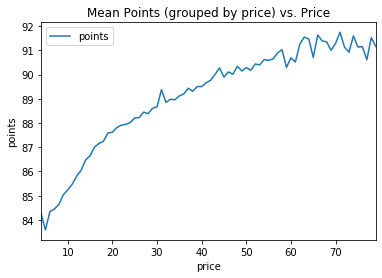

In [6]:
# Calculating Quartiles For inclusive data range
q1 = df['price'].quantile(.25)
q2 = df['price'].quantile(.75)
df_price_vs_rating = (df[df['price']
                         .between((q1 - (1.5*(q2-q1))), (q2 + (1.5*(q2-q1))), inclusive=True)][['price', 'points']]
                         .dropna(how='any'))

#Decided to use mean points as a comparison value because the point data value is too condensed and skews the graph
price_mean_points_df = df_price_vs_rating.sort_values(by='price', ascending='False').groupby('price').mean()
price_mean_points_df.plot()
plt.ylabel('points')
plt.title('Mean Points (grouped by price) vs. Price')

print("Across total data population")
plt.show()

In [7]:
def plot_country(_name):
    #Data
    _df = df[df['country'] == _name].dropna(subset=['price', 'points'],how='any') 
    country_df = _df[['price', 'points']]

    #Calculating Quartiles
    q1 = country_df['price'].quantile(.25)
    q2 = country_df['price'].quantile(.75)

    outlier_inclusie_df = (country_df[country_df['price']
                                      .between((q1 - (1.5*(q2-q1))), (q2 + (1.5*(q2-q1))), inclusive=True)])
    
    pd.DataFrame(outlier_inclusie_df.groupby('price').mean()).plot()
    plt.title(f'{_name} - Mean Points (grouped by price) vs. Price')
    plt.show()
    
    plt.scatter(outlier_inclusie_df['price'], outlier_inclusie_df['points'])
    plt.title(f"{_name} - Price vs. Points w/o Outliers")
    plt.savefig(f"../Analysis/png_output/{_name}_Scatter")
    plt.show()

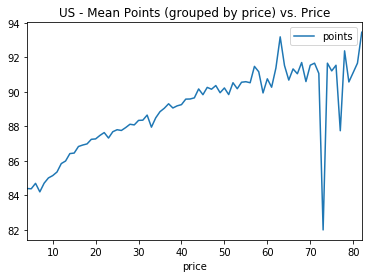

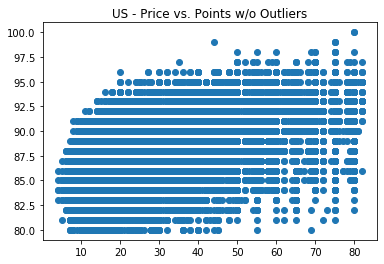

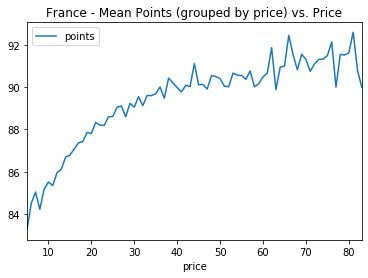

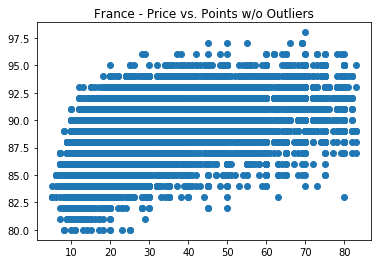

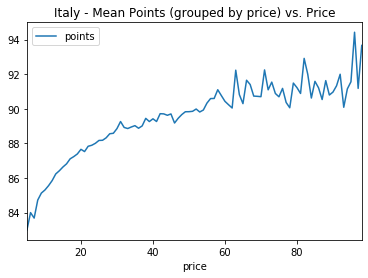

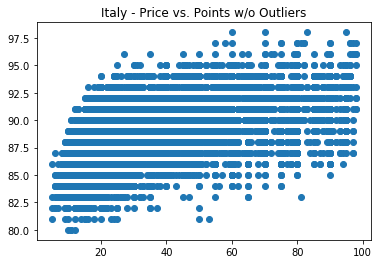

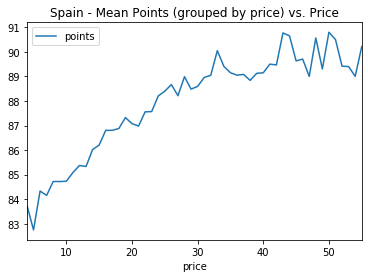

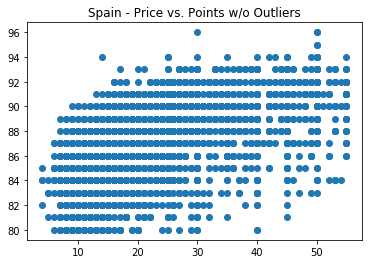

In [8]:
# Grouping by top 5 country's and doing price analysis against each
# Grabbing list for filter
top_four_list = (list(df.groupby('country')
                      .count().sort_values(by='points', ascending=False)
                      .reset_index().iloc[0:4, 0]))

for country in top_four_list:
    plot_country(country)

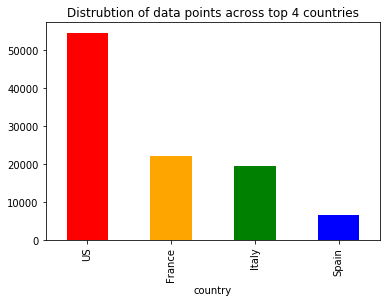

In [9]:
#Plotting data point count across top 4 countries
(df.groupby('country')
 .agg(['count'])['description']['count']
 .sort_values(ascending=False)
 .head(4).plot(kind='bar', color=['red', 'orange', 'green', 'blue']))

plt.title('Distrubtion of data points across top 4 countries')

plt.savefig(f"../Analysis/png_output/total_points_top_4")
plt.show()